In [1]:
import numpy as np
from matplotlib import pyplot as plt
import utils
from scipy import optimize
import pandas as pd
from scipy import constants as const

In [2]:
def objective(x, T_data, k_data):
    A, b, Ea = x
    k_ = utils.arrhenius_rate(A, b, Ea, T_data)
    return np.log10(k_) - np.log10(k_data)

def fit_rate_constant():
    r = utils.ReactionExplorer('thermodata121_test.yaml')
    P = 1 # bars
    T_data1 = np.linspace(300,2500,30)
    k_data1 = np.empty(T_data1.shape[0])
    for i in range(T_data1.shape[0]):
        tmp  = r.evaluate_rates(T_data1[i], P)
        k_data1[i] = tmp['S + O2 Lu']['k_f']

    T_data2 = np.linspace(100,300,30)
    k_data2 = np.ones(T_data2.shape[0])*2e-12
    
    T_data = np.append(T_data1,T_data2)
    k_data = np.append(k_data1,k_data2)

    sol = optimize.root(objective, [2e-12, 0, 0], method='lm', args=(T_data,k_data))
    
    A, b, Ea = sol.x
    print('  rate-constant: {A: %.2e, b: %.2f, Ea: %.1f}'%(A,b,Ea))

fit_rate_constant()

  rate-constant: {A: 3.21e-16, b: 1.35, Ea: -285.8}


/var/folders/sf/43vm953d201c4jw4yg22hnhc0000gn/T/ipykernel_49813/2994376506.py:4: RuntimeWarning: invalid value encountered in log10
  return np.log10(k_) - np.log10(k_data)


/Users/nicholas/Documents/Research_local/random/rate_explorer/experiments/5-29-24/utils.py:150: RuntimeWarning: overflow encountered in exp
  reverse_factor = (1.0/np.exp(-Dg_forward/(const.R * T))) * (k_boltz*T/self.reference_pressure)**(m-l)


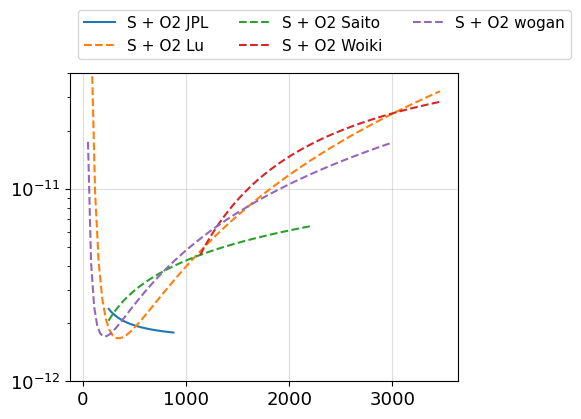

In [3]:
r = utils.ReactionExplorer('thermodata121_test.yaml')

plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(1,1,figsize=[5,4],sharey=True)

T = np.linspace(252,878,100)
P = 1
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r.evaluate_rates(T1, P)
    k1[i] = tmp['S + O2 JPL']['k_f']
ax.plot(T, k1, ls='-', label='S + O2 JPL')

T = np.linspace(51,3460,100)
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r.evaluate_rates(T1, P)
    k1[i] = tmp['S + O2 Lu']['k_f']
ax.plot(T, k1, ls='--', label='S + O2 Lu')


T = np.linspace(250,2200,100)
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r.evaluate_rates(T1, P)
    k1[i] = tmp['S + O2 Saito']['k_f']
ax.plot(T, k1, ls='--', label='S + O2 Saito')

T = np.linspace(1138,3463,100)
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r.evaluate_rates(T1, P)
    k1[i] = tmp['S + O2 Woiki']['k_f']
ax.plot(T, k1, ls='--', label='S + O2 Woiki')


T = np.linspace(51,3000,100)
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r.evaluate_rates(T1, P)
    k1[i] = tmp['S + O2 wogan']['k_f']
ax.plot(T, k1, ls='--', label='S + O2 wogan')


ax.set_yscale('log')
#ax.set_xlim(50,2000)
ax.set_ylim(1e-12,4e-11)
ax.grid(alpha=0.4)
ax.legend(ncol=3,bbox_to_anchor=(0, 1.02), loc='lower left',fontsize=11)

plt.show()

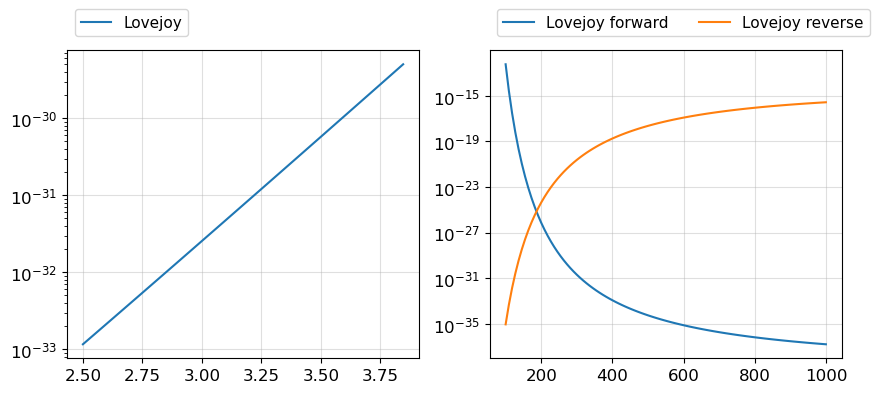

In [4]:
r = utils.ReactionExplorer('thermodata121_test.yaml')

plt.rcParams.update({'font.size': 12})
fig,axs = plt.subplots(1,2,figsize=[10,4])

ax = axs[0]
T = np.linspace(260,400,100)
P = 1
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r.evaluate_rates(T1, P)
    k1[i] = tmp['SO3 + H2O Lovejoy']['k_f']
ax.plot(1e3/T, k1, ls='-', label='Lovejoy')

ax.set_yscale('log')
ax.grid(alpha=0.4)
ax.legend(ncol=3,bbox_to_anchor=(0, 1.02), loc='lower left',fontsize=11)

ax = axs[1]
T = np.linspace(100,1000,100)
P = 1
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r.evaluate_rates(T1, P)
    k1[i] = tmp['SO3 + H2O Lovejoy']['k_f']
ax.plot(T, k1, ls='-', label='Lovejoy forward')

k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r.evaluate_rates(T1, P)
    k1[i] = tmp['SO3 + H2O Lovejoy']['k_r']
ax.plot(T, k1, ls='-', label='Lovejoy reverse')

ax.set_yscale('log')
ax.grid(alpha=0.4)
ax.legend(ncol=3,bbox_to_anchor=(0, 1.02), loc='lower left',fontsize=11)

plt.show()

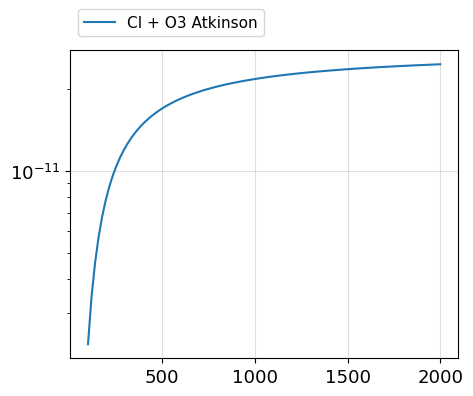

In [7]:
r = utils.ReactionExplorer('thermodata121_test.yaml')

plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(1,1,figsize=[5,4],sharey=True)

T = np.linspace(100,2000,100)
P = 1
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r.evaluate_rates(T1, P)
    k1[i] = tmp['Cl + O3 Atkinson']['k_f']
ax.plot(T, k1, ls='-', label='Cl + O3 Atkinson')



ax.set_yscale('log')
#ax.set_xlim(50,2000)
#ax.set_ylim(1e-12,4e-11)
ax.grid(alpha=0.4)
ax.legend(ncol=3,bbox_to_anchor=(0, 1.02), loc='lower left',fontsize=11)

plt.show()

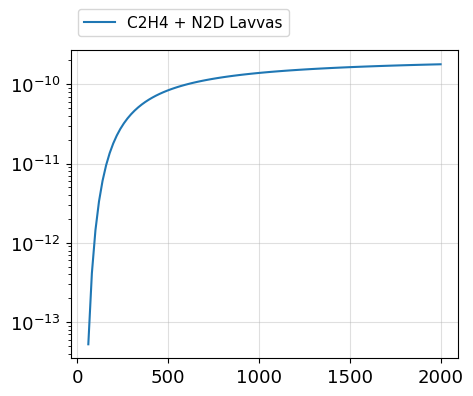

In [6]:
r = utils.ReactionExplorer('thermodata121_test.yaml')

plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(1,1,figsize=[5,4],sharey=True)

T = np.linspace(60,2000,100)
P = 1
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r.evaluate_rates(T1, P)
    k1[i] = tmp['C2H4 + N2D Lavvas']['k_f']
ax.plot(T, k1, ls='-', label='C2H4 + N2D Lavvas')


ax.set_yscale('log')
#ax.set_xlim(50,2000)
#ax.set_ylim(1e-12,4e-11)
ax.grid(alpha=0.4)
ax.legend(ncol=3,bbox_to_anchor=(0, 1.02), loc='lower left',fontsize=11)

plt.show()